# Statistical Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load cleaned dataset
data_path = "../data/processed/Cleaned_Multinational_Company_Performance.csv"
df = pd.read_csv(data_path)

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    30000 non-null  object 
 1   Country           30000 non-null  object 
 2   City              30000 non-null  object 
 3   Product Category  30000 non-null  object 
 4   Revenue           30000 non-null  float64
 5   Units Sold        30000 non-null  int64  
 6   Profit Margin     30000 non-null  float64
 7   Transaction Date  30000 non-null  object 
 8   Employee ID       30000 non-null  object 
 9   Customer Segment  30000 non-null  object 
 10  Order Priority    30000 non-null  object 
 11  Sales Channel     30000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.7+ MB
None
  Transaction ID         Country        City Product Category  Revenue  \
0        T000001         Belgium     Antwerp           Sports   101.46   
1        T000002  

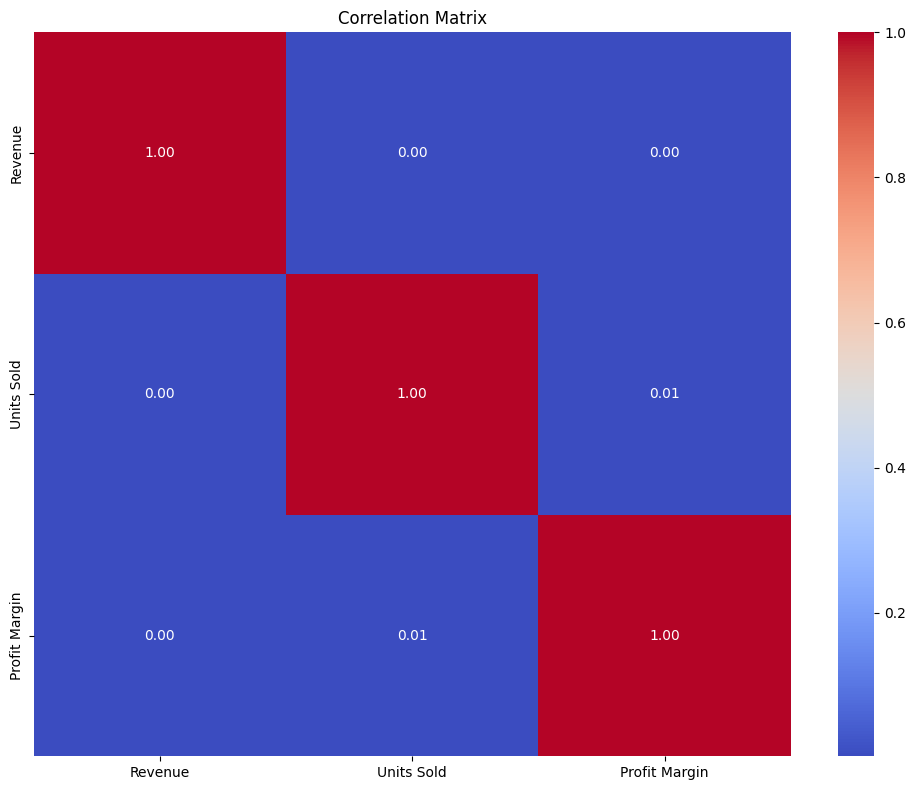

In [6]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation = numeric_df.corr()

# Plot heatmap of correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

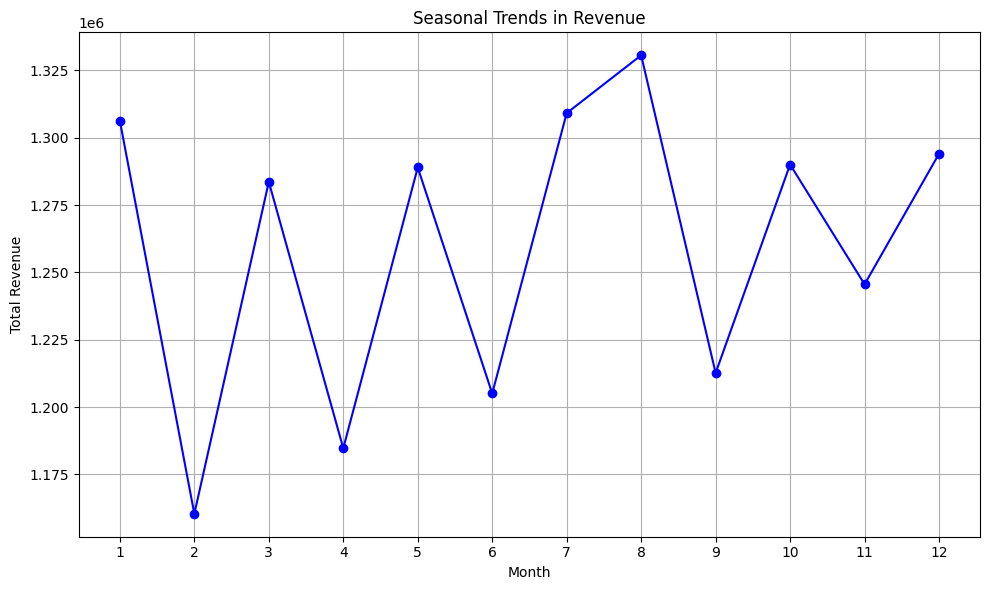

In [7]:
# Extract month from transaction date
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Month'] = df['Transaction Date'].dt.month

# Group revenue by month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# Plot seasonal trends
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='b')
plt.title('Seasonal Trends in Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

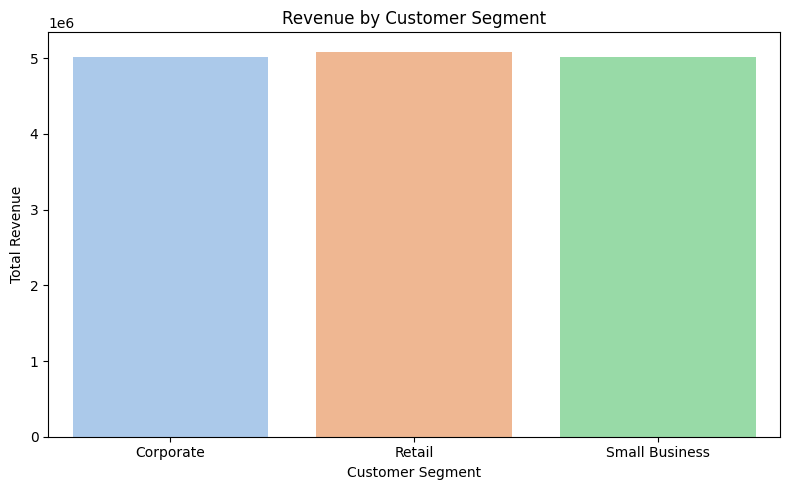

In [9]:
# Aggregate revenue by customer segment
revenue_by_segment = df.groupby('Customer Segment')['Revenue'].sum().reset_index()

# Visualize revenue by customer segment
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Customer Segment', 
    y='Revenue', 
    data=revenue_by_segment, 
    hue='Customer Segment',  # Assign hue to x variable
    palette='pastel',
    dodge=False  # Avoid grouping bars when hue is set to x variable
)
plt.title('Revenue by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Revenue')
plt.legend([], [], frameon=False)  # Remove the redundant legend
plt.tight_layout()
plt.show()